<a href="https://colab.research.google.com/github/w2k31984/tripleten_Bootcamp_DS/blob/master/01_intro_to_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bienvenida

Este es un cuaderno (o notebook) de Jupyter, en el cual podemos escribir tanto texto (en markdown) como código en Python. En este notebook veremos una rápida introducción a lo que es Python y explicaremos por qué es tan útil para el análisis o la ciencia de datos.

Veremos de manera resumida los siguientes conceptos:
- Variables
- Bucles y enunciados condicionales
- Funciones
- Estructuras de datos
- DataFrames de Pandas
- Manipulación y visualización de datos

Además, discutiremos brevemente otros temas como funciones y lo que es una base de datos y el rol que jugan en todo tipo de aplicaciones (aplicaciones web, aplicaciones para celulares, y APIs).

# Variables

Una variable es un nombre simbólico que apunta a cualquier objeto. Por ejemplo, podemos definir la variable `prices` que apunte a una lista de precios de nuestra tienda online. La idea es que en lugar de desplegar toda la lista de precios, podemos referirnos a la variable `prices` y realizar alguna operación con toda la lista, por ejemplo, calcular el precio promedio de todos nuestros productos.

In [1]:
prices = [100, 125, 150, 175, 201]

sum(prices) / len(prices)

150.2

Las variables pueden almacenar cualquier tipo de objeto. Claramente, hay objetos con los que vamos a poder realizar operaciones (como sumar sus elementos) y objetos con los que no podremos realizar unas operaciones.

# Bucles y enunciados condicionales

en Python tenemos dos enunciados sumamente importantes a la hora de construir código. Podemos realizar **bucles**, por ejemplo, realizar una misma operación para cada elemento de un iterador (listas, diccionarios, filas de una tabla, etc.).

Pongamos un ejemplo. Imaginen que la lista de precios descrita más arriba está en USD (dólares americanos) y la queremos pasar a MXN (pesos mexicanos). El tipo de cambio al 23 de octubre del 2023 es de 18.1218 (según el FIX del Banco de México). Construyamos una nueva lista usando un bucle.

In [2]:
prices_mxn = []

for price in prices:
    price_mxn = price * 18.1218

    prices_mxn.append(price_mxn)

prices_mxn

[1812.18, 2265.225, 2718.27, 3171.315, 3642.4818]

Muchas veces vamos a querer ejecutar cierta instrucción solo si alguna condición se cumple. Para esto existen los **enunciados condicionales**.

Supongamos que nuestros precios vienen en diferentes monedas y queremos usar un tipo de cambio distinto para cada uno. Este es un ejemplo ideal para los enunciados condicionales. Supongamos que todo lo queremos pasar a dólares americanos.

In [3]:
prices_currencies = ["100 USD", "550 MXN", "100625 COP", "150000 CLP", "100 XXX"]
prices_usd = []

for price in prices_currencies:
    if "USD" in price:
        prices_usd.append(float(price.replace(" USD", "")))
    elif "MXN" in price:
        prices_usd.append(float(price.replace(" MXN", "")) / 18.1218)
    elif "COP" in price:
        prices_usd.append(float(price.replace(" COP", "")) / 4213.55)
    elif "CLP" in price:
        prices_usd.append(float(price.replace(" CLP", "")) / 932.98)
    else:
        print("Currency not found.")

for i, price in enumerate(prices_usd):
    prices_usd[i] = round(prices_usd[i], 2)

prices_usd

Currency not found.


[100.0, 30.35, 23.88, 160.78]

# Funciones

El concepto de funciones es sumamente importante para la construcción de código eficiente. La idea de una función es englobar una serie de instrucciones y poder ejecutar esa misma serie en diferentes ocasiones. Para hacer una función lo más eficiente posible, se tiene que considerar el uso de "argumentos" para que las instrucciones se ejecuten con diferentes valores cada vez que se requiera.

Construyamos una función que nos calcule ya sea la mediana o la media de una lista de precios y usémosla para almancenar los valores un diferentes variables.

In [4]:
from statistics import median

def compute_aggregation(prices, agg="mean"):

    if agg == "mean":
        statistic = sum(prices) / len(prices)
    elif agg == "median":
        statistic = median(prices)
    else:
        raise ValueError("Aggregation not implemented.")

    return statistic

In [7]:
prices_mean = compute_aggregation(prices_usd)
prices_median = compute_aggregation(prices_usd, agg="median")

In [8]:
print(f"""
Avg. price: {prices_mean}
Median price: {prices_median}
""")


Avg. price: 78.7525
Median price: 65.175



In [ ]:
compute_aggregation(prices_usd, agg="stddev")

# Estructuras de datos

Python permite almacenar variables (o datos) en diferentes estructuras. Hemos visto ya el concepto de listas (noten cómo las listas se crean usando corchetes cuadrados `[]`), sin embargo, existen varias otras formas de almacenar datos. Hoy solo veremos otras dos estructuras de datos: los diccionarios y DataFrames de Pandas.

Los diccionarios son una forma de almacenar información de manera que la información tenga nombres y podamos llamar a esa información por su nombre. Al igual que las listas, podemos almacenar cualquier información, ¡inclusive otros diccionarios!

In [9]:
prices_dict = {
    "banana": 5.5,
    "apple": 2.3,
    "laptops": {
        "macbook-pro": 1500,
        "lenovo": 1000
    }
}

print(f"""
Price for banana: {prices_dict.get('banana')}
Price for Lenovo laptop: {prices_dict.get('laptops').get('lenovo')}
""")


Price for banana: 5.5
Price for Lenovo laptop: 1000



Una estructura de datos que es muy usada tanto por analistas de datos como por científicos de datos son los DataFrames de Pandas. Esta estructura de datos es lo más parecido a una tabla (sí, como las de Excel) en Python. Usar tablas nos permite realizar muchos tipos de manipulaciones para llegar a conclusiones útiles para la toma de decisiones.

In [10]:
import pandas as pd

prices_df = pd.DataFrame(data={
    "product": ["banana", "apple", "macbook-pro", "lenovo"],
    "category": ["fruit", "fruit", "laptop", "laptop"],
    "price": [5.5, 2.3, 1500, 1000],
    "discount": [0, 0, 5, 5]
})

prices_df

,product,category,price,discount
0,banana,fruit,5.5,0
1,apple,fruit,2.3,0
2,macbook-pro,laptop,1500.0,5
3,lenovo,laptop,1000.0,5


Podemos usar este DataFrame para calcular el precio promedio por categoría del producto.

In [11]:
prices_df.groupby("category")["price"].mean().reset_index().rename(columns={"price": "average_price"})

,category,average_price
0,fruit,3.9
1,laptop,1250.0


Si quieren resolver más ejercicios sobre estructuras de datos, les dejamos los siguientes recursos (cuadernos de Colab):
- [Ejercicios de listas](https://colab.research.google.com/drive/1lUfz9qrZaqT6XZpjCM4w2LhHFd2MLKzQ?usp=sharing)
- [Ejercicios de diccionarios](https://colab.research.google.com/drive/1Z3l2fuodvobfG1M5_IfhnOwu5IFTfK5g?usp=sharing)
- [Ejercicios de DataFrames](https://colab.research.google.com/drive/1ETcOsNeZbsWMd0gAP3q3MrUYsA4gdHzi?usp=sharing)

Si quieren practicar todavía más el uso de DataFrames, les dejamos esta lista de ejercicios:

- [Transformaciones de Pandas DataFrames](https://colab.research.google.com/drive/1aBKT4ZiS67ynKg1Jvz0OuTfOurX50Brw?usp=share_link)

# Manipulación y visualización de datos

Generalmente a una tabla o un conjunto de tablas (más adelante hablaremos sobre las bases de datos) con información se le llaman "datos". Por manipulación de datos nos referimos a realizar operaciones para construir nuevos datos que podamos usar para un análisis, construir alguna herramienta o nos ayude a tomar decisiones informadas. Visualización de datos se refiere a la parte de un análisis donde contruimos gráficas, tablas resumen y/o métricas para los mismos propósitos.

Supongamos que tenemos datos de ventas de nuestros productos y queremos realizar un conteo y sumar la cantidad vendida por producto. Además, queremos visualizar esto en una gráfica de barras para hacer una comparación. Finalmente, queremos entender por qué tenemos más ingresos de un producto que de otro.

In [12]:
import random

random.seed(200)

sales_df = pd.DataFrame(data={
    "product": (["banana"] * 2 + ["apple"] * 2) * 4 + ["banana", "macbook-pro", "lenovo", "apple"],
    "quantity_sold": [random.randint(50, 100) for i in range(16)] + [64, 1, 2, 72],
    "date": ["2023-10-01"] * 4 + ["2023-10-02"] * 10 + ["2023-10-03"] * 2 + ["2023-10-04"] * 4
})

pd.concat([
    sales_df.head(2),
    sales_df.tail(3)
])

,product,quantity_sold,date
0,banana,52,2023-10-01
1,banana,63,2023-10-01
17,macbook-pro,1,2023-10-04
18,lenovo,2,2023-10-04
19,apple,72,2023-10-04


In [13]:
sales_with_prices = sales_df.merge(prices_df, on="product")

sales_with_prices["total_sold"] = (
    sales_with_prices["quantity_sold"] * sales_with_prices["price"] * (1 - sales_with_prices["discount"] / 100)
)

sales_with_prices.tail()

,product,quantity_sold,date,category,price,discount,total_sold
15,apple,51,2023-10-03,fruit,2.3,0,117.3
16,apple,78,2023-10-03,fruit,2.3,0,179.4
17,apple,72,2023-10-04,fruit,2.3,0,165.6
18,macbook-pro,1,2023-10-04,laptop,1500.0,5,1425.0
19,lenovo,2,2023-10-04,laptop,1000.0,5,1900.0


In [14]:
sales_by_product = (
    sales_with_prices
    .groupby("product")[["total_sold", "quantity_sold"]]
    .sum()
    .reset_index()
)

sales_by_product

,product,total_sold,quantity_sold
0,apple,1660.6,722
1,banana,3234.0,588
2,lenovo,1900.0,2
3,macbook-pro,1425.0,1


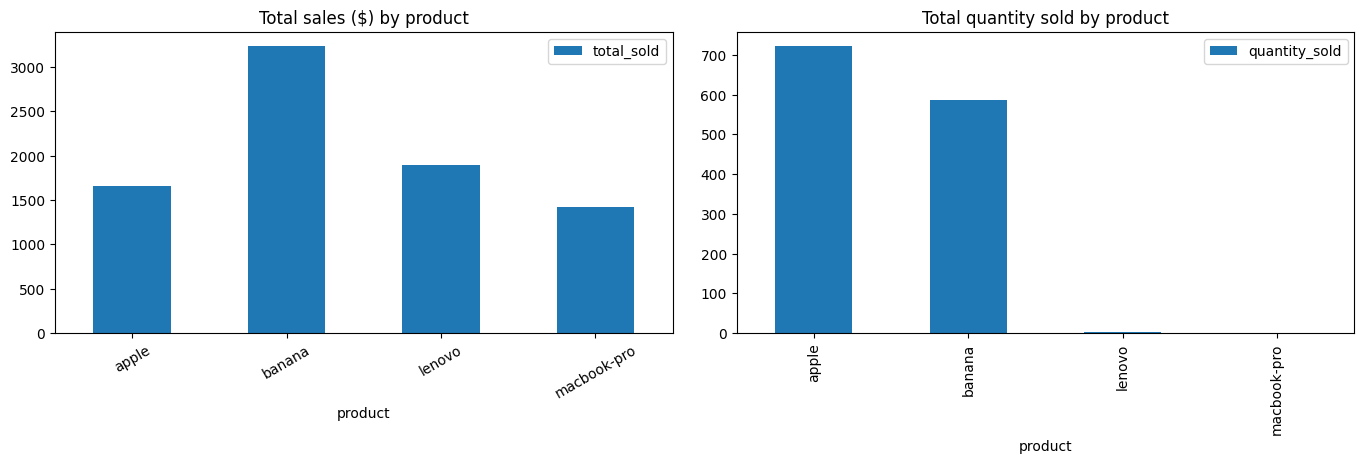

In [15]:
import matplotlib.pyplot as plt

sales_by_product = (
    sales_with_prices
    .groupby("product")[["total_sold", "quantity_sold"]]
    .sum()
    .reset_index()
)

fig, ax = plt.subplots(ncols=2, figsize=(14, 5))

ax[0].set_title("Total sales ($) by product")
sales_by_product.plot(kind="bar", x="product", y="total_sold", ax=ax[0])
ax[0].tick_params(rotation=30, axis="x")

ax[1].set_title("Total quantity sold by product")
sales_by_product.plot(kind="bar", x="product", y="quantity_sold", ax=ax[1])
ax[0].tick_params(rotation=30, axis="x")

fig.tight_layout(pad=2.0)

# Conclusión

En este cuaderno se introdujeron conceptos básicos de Python y nos adentramos en el mundo de los datos. Un día a día de un analista o científico de datos es tomar uno o varios conjuntos de datos, prepararlos, analizarlos, visualizarlos y, finalmente, introducir de cierta manera la información para crear nuevas herramientas o tomar decisiones informadas que agreguen valor al proyecto o negocio en el que se esté trabajando.